In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV without headers
df = pd.read_csv("cleaned_output.csv", header=None)

# Use column indices directly:
X = df[0]  # first column (hex packets)
y = df[1]  # second column (attack type)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Vectorize the hex sequences using bag-of-words approach
vectorizer = CountVectorizer(analyzer="word", token_pattern=r"\S+")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)

# 4. Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_vec, y_train)

# 5. Evaluate the classifier
y_pred = clf.predict(X_test_vec)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=clf.classes_, 
            yticklabels=clf.classes_,
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

joblib.dump(clf, "rf_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")
print("Model and vectorizer saved!")

🔹 Loading CSV file...
✅ CSV loaded. Total records: 35300706
🔹 Downsampling dataset (balanced cap at 10,000/class)...


C:\Users\User\AppData\Local\Temp\ipykernel_88772\3275546532.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_downsampled = df.groupby(1, group_keys=False).apply(


✅ Downsampling complete. Total records: 274211
🔹 Splitting dataset (80/20)...
✅ Train: 219368, Test: 54843
🔹 Vectorizing with TF-IDF (char n-grams)...
✅ TF-IDF vectorization complete.
🔹 Training LightGBM classifier...
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 3.374258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4326801
[LightGBM] [Info] Number of data points in the train set: 219368, number of used features: 20000
[LightGBM] [Info] Start training from score -3.663562
[LightGBM] [Info] Start training from score -3.663562
[LightGBM] [Info] Start training from score -3.663562
[LightGBM] [Info] Start training from score -3.663562
[LightGBM] [Info] Start tr

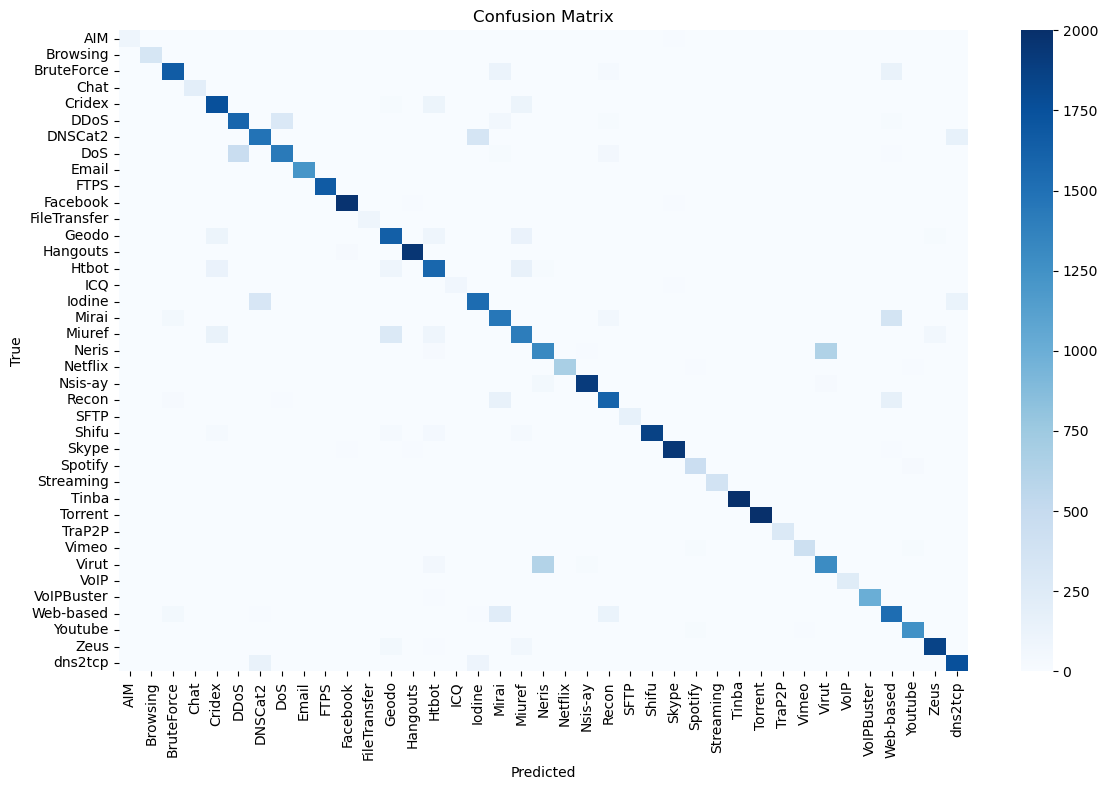

🔹 Saving model and vectorizer...
✅ Saved as 'lgbm_model.pkl' and 'vectorizer.pkl'


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from lightgbm import LGBMClassifier

print("🔹 Loading CSV file...")
df = pd.read_csv("cleaned_output.csv", header=None)
print(f"✅ CSV loaded. Total records: {len(df)}")

print("🔹 Downsampling dataset (balanced cap at 10,000/class)...")
MAX_PER_CLASS = 10000
df_downsampled = df.groupby(1, group_keys=False).apply(
    lambda x: x.sample(n=min(MAX_PER_CLASS, len(x)), random_state=42)
)
print(f"✅ Downsampling complete. Total records: {len(df_downsampled)}")

X = df_downsampled[0]  # hex payloads
y = df_downsampled[1]  # labels

print("🔹 Splitting dataset (80/20)...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print(f"✅ Train: {len(X_train)}, Test: {len(X_test)}")

print("🔹 Vectorizing with TF-IDF (char n-grams)...")
vectorizer = TfidfVectorizer(
    analyzer='char_wb',
    ngram_range=(3, 5),
    max_features=20000
)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
print("✅ TF-IDF vectorization complete.")

print("🔹 Training LightGBM classifier...")
clf = LGBMClassifier(
    n_estimators=200,        # Fewer trees
    max_depth=10,            # Shallower trees
    learning_rate=0.1,       # Still accurate
    class_weight='balanced',
    min_data_in_leaf=20,     # Prevent over-splitting
    subsample=0.8,           # Faster with slight randomness
    colsample_bytree=0.8,    # Use fewer features per tree
    n_jobs=-1,
    random_state=42
)
clf.fit(X_train_vec, y_train)
print("✅ LightGBM training complete.")

print("🔹 Evaluating model...")
y_pred = clf.predict(X_test_vec)
print("📋 Classification Report:")
print(classification_report(y_test, y_pred))

print("🔹 Confusion Matrix...")
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=False, fmt='d',
            xticklabels=clf.classes_, 
            yticklabels=clf.classes_, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

print("🔹 Saving model and vectorizer...")
joblib.dump(clf, "lgbm_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")
print("✅ Saved as 'lgbm_model.pkl' and 'vectorizer.pkl'")


In [7]:
plt.show()